# xyグラフの描画

PyGMTは本家GMTと同じく，投影法（projection）に X を選ぶことで，直交座標系のXYグラフを作成することができます．

ここでは，データ作成や比較のためにNumPyとmatplotlibも使います．

In [1]:
import pygmt
import numpy as np
import matplotlib.pyplot as plt

## 関数グラフ

まずはデータを作成してみましょう．

In [2]:
x = np.arange(0, 4*np.pi, np.pi/50)
y = np.sin(x)

`fig.plot`で`pen`を指定すると曲線が描画できます．

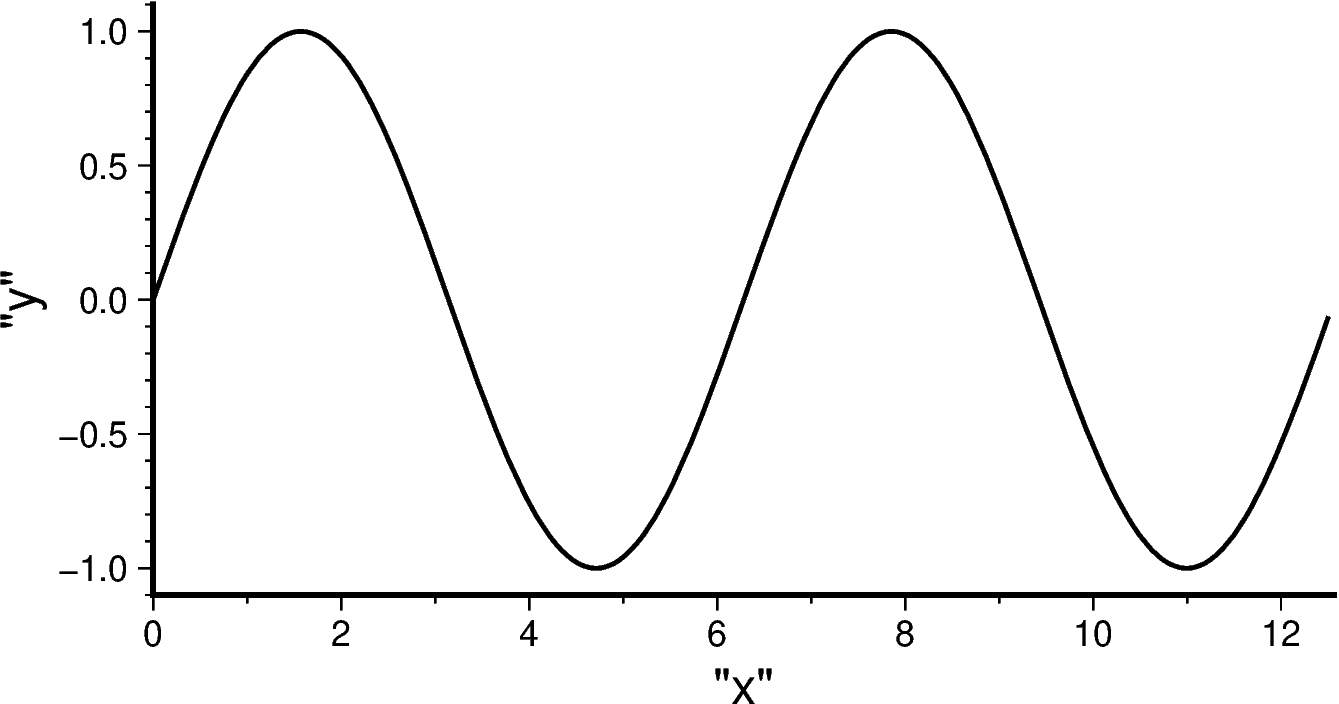

In [3]:
fig = pygmt.Figure()

fig.plot(region = [0, 4*np.pi, -1.1, 1.1], 
         projection = 'X10c/5c', 
         x = x, y = y, 
         pen = 'thick,black', 
         frame = ['WS', 'xaf+lx', 'yaf+ly'])

fig.show()

`plot`を重ねていくことで様々なグラフを重ね描きできます：

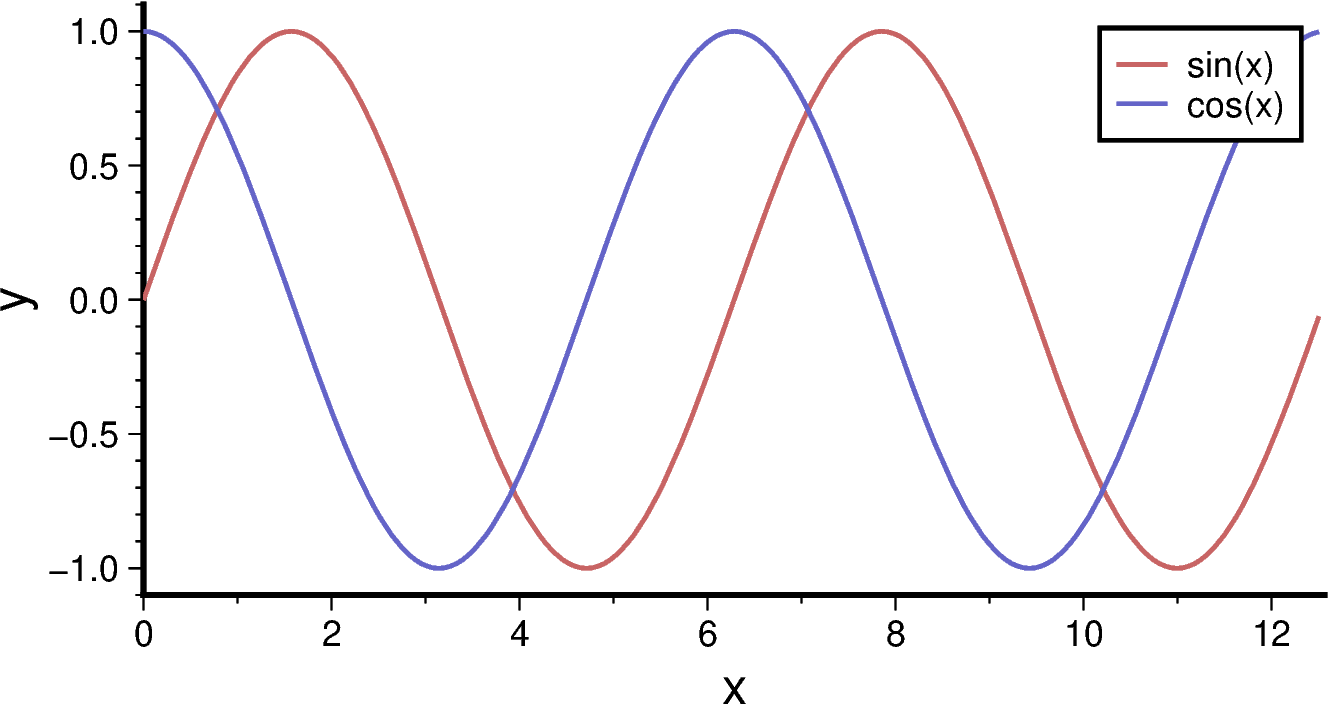

In [5]:
fig = pygmt.Figure()

fig.basemap(region = [0, 4*np.pi, -1.1, 1.1], 
            projection = 'X10c/5c', 
            frame = ['WS', 'xaf+lx', 'yaf+ly'])
fig.plot(x = x, y = np.sin(x), pen = 'thick,200/100/100', label="sin(x)")
fig.plot(x = x, y = np.cos(x), pen = 'thick,100/100/200', label="cos(x)")
fig.legend()
fig.show()

ここでは，`fig.legend()` を用いて凡例を表示しました．`plot`などで`label`オプションにより名前をつけておけば，`legend()`は引数なしで自動的に右上に凡例を表示してくれます．位置や表現を調整したいときには[マニュアル](https://www.pygmt.org/latest/gallery/basemaps/double_y_axes.html#sphx-glr-gallery-basemaps-double-y-axes-py)を参考にオプションを追加するのが良いでしょう．

## シンボルのプロット

`plot()`に `style` オプションを追加することで，シンボルや（固定サイズの場合は）サイズの指定を行います．`style`指定がないと，`plot`はデータとして与えられた点をつないだ線を描画します．

シンボルは[GMT公式ドキュメント](https://docs.generic-mapping-tools.org/latest/plot.html)の以下の図の通りです：
<img src="https://docs.generic-mapping-tools.org/latest/_images/GMT_base_symbols1.png">

 `x` `y` 座標を乱数（`np.random.rand`）によって生成してプロットを行ってみましょう：

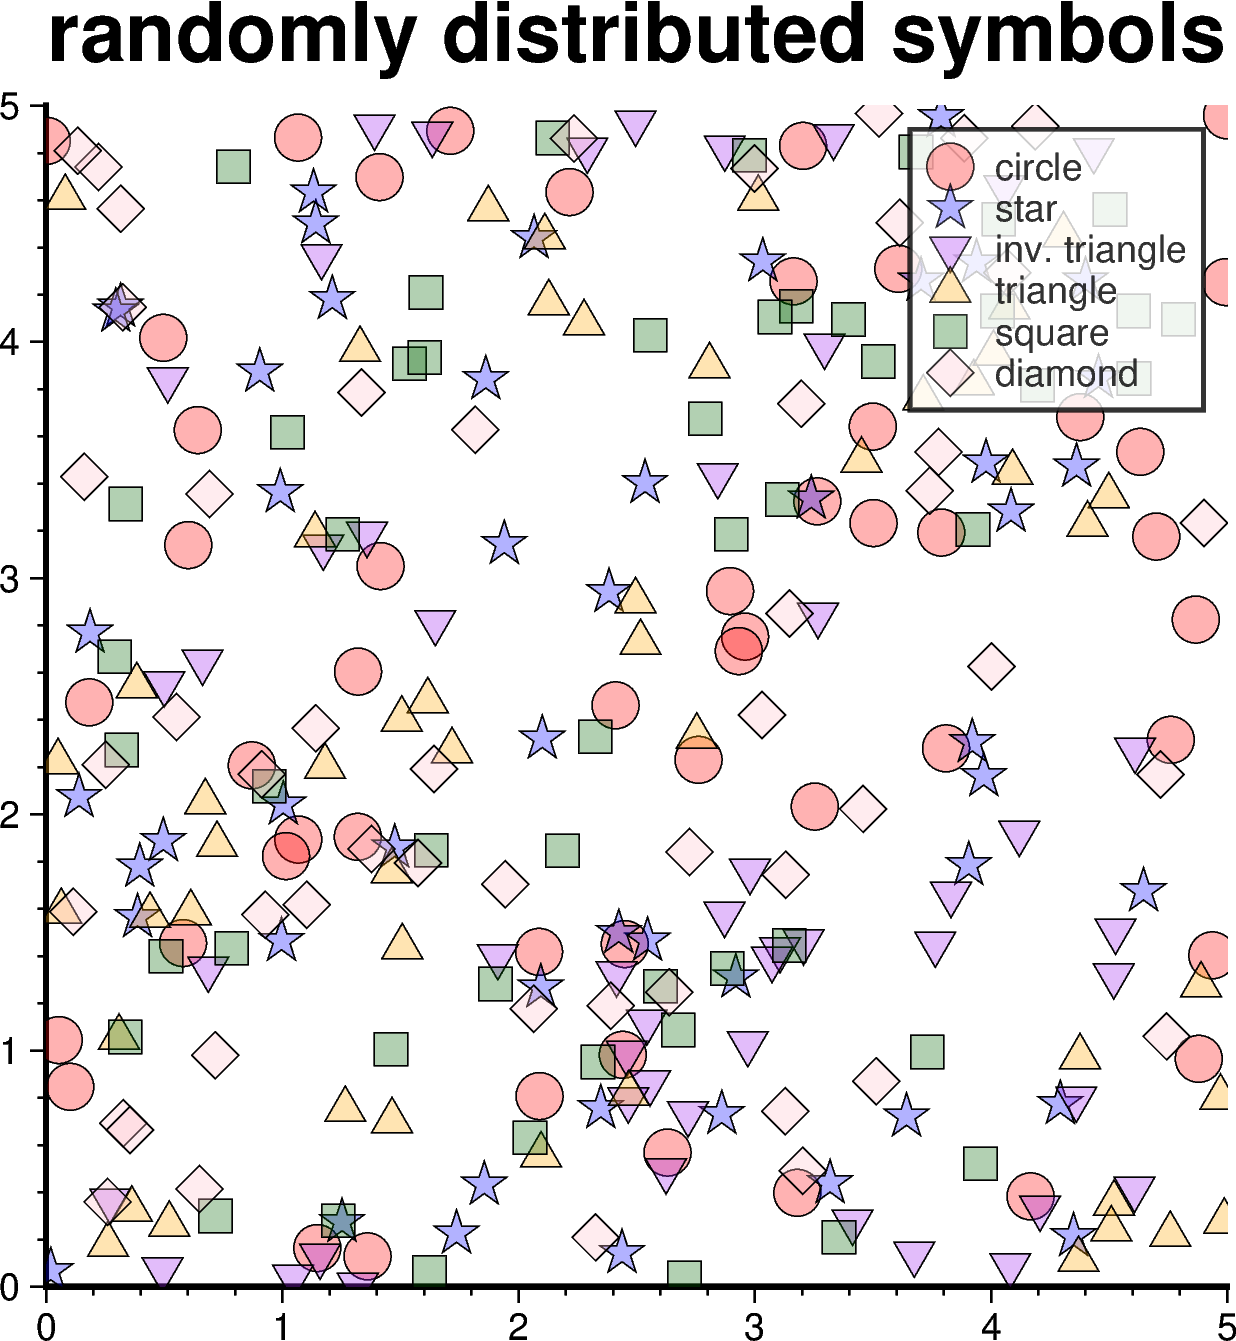

In [6]:
n = 50

fig = pygmt.Figure()

# シンボルの種類と色
symb = ['c',   'a',    'i',      't',      's',         'd']    
col  = ['red', 'blue', 'purple', 'orange', 'darkgreen', 'pink']
name = ['circle', 'star', 'inv. triangle', 'triangle', 'square', 'diamond']

fig.basemap(
    projection = 'X10c/10c', 
    region     = [0, 5, 0, 5], 
    frame      = ['WS+trandomly distributed symbols', 'xaf', 'yaf']
)

for i in range(len(symb)):
    
    dat = 5 * np.random.rand(n,n)

    fig.plot(
        data  = dat, 
        style = symb[i] + '0.4c', 
        fill  = col[i] + '@70',
        pen   = 'default,black', 
        label = name[i]
    )

fig.legend(transparency=20)

fig.show()